In [1]:
!wget https://bitbucket.org/ishaanjav/code-and-deploy-custom-tensorflow-lite-model/raw/a4febbfee178324b2083e322cdead7465d6fdf95/fruits.zip

--2025-05-19 16:52:31--  https://bitbucket.org/ishaanjav/code-and-deploy-custom-tensorflow-lite-model/raw/a4febbfee178324b2083e322cdead7465d6fdf95/fruits.zip
Resolving bitbucket.org (bitbucket.org)... 13.200.41.136, 13.200.41.134, 13.200.41.135, ...
Connecting to bitbucket.org (bitbucket.org)|13.200.41.136|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 105946856 (101M) [application/zip]
Saving to: ‘fruits.zip’

fruits.zip          100%[===================>] 101.04M  17.1MB/s    in 6.5s    

2025-05-19 16:52:40 (15.5 MB/s) - ‘fruits.zip’ saved [105946856/105946856]



In [2]:
!unzip fruits.zip

Archive:  fruits.zip
   creating: fruits/
  inflating: __MACOSX/._fruits       
  inflating: fruits/.DS_Store        
  inflating: __MACOSX/fruits/._.DS_Store  
   creating: fruits/test/
   creating: fruits/train/
   creating: fruits/validation/
   creating: fruits/test/apple/
  inflating: fruits/test/.DS_Store   
  inflating: __MACOSX/fruits/test/._.DS_Store  
   creating: fruits/test/banana/
   creating: fruits/test/orange/
   creating: fruits/train/apple/
  inflating: fruits/train/.DS_Store  
  inflating: __MACOSX/fruits/train/._.DS_Store  
   creating: fruits/train/banana/
   creating: fruits/train/orange/
   creating: fruits/validation/apple/
  inflating: fruits/validation/.DS_Store  
  inflating: __MACOSX/fruits/validation/._.DS_Store  
   creating: fruits/validation/banana/
   creating: fruits/validation/orange/
  inflating: fruits/test/apple/Screen Shot 2018-06-08 at 5.27.19 PM.png  
  inflating: __MACOSX/fruits/test/apple/._Screen Shot 2018-06-08 at 5.27.19 PM.png  
  inflatin

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
tf.__version__

'2.18.0'

In [5]:
img_height, img_width = 32,32
batch_size = 20

train_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/train",
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/validation",
    image_size=(img_height, img_width),
    batch_size=batch_size
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/test",
    image_size=(img_height, img_width),
    batch_size=batch_size
)



Found 460 files belonging to 3 classes.
Found 66 files belonging to 3 classes.
Found 130 files belonging to 3 classes.


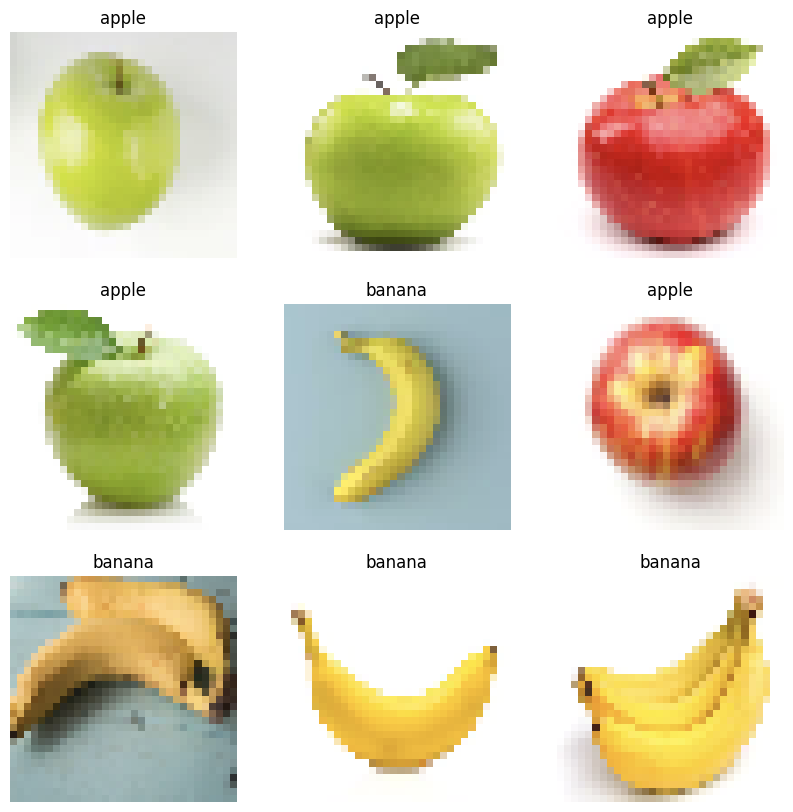

In [6]:
class_names = ["apple","banana","orange"]
plt.figure(figsize=(10,10))
for images,labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32,3,activation="relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64,3,activation="relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128,3,activation="relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation="softmax"),
    tf.keras.layers.Dense(3)
])

In [9]:
model.compile(
    optimizer="rmsprop",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"]
)

In [11]:
model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=25
)

Epoch 1/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.9177 - loss: 0.6154 - val_accuracy: 0.7121 - val_loss: 0.7935
Epoch 2/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.9300 - loss: 0.5993 - val_accuracy: 0.9545 - val_loss: 0.5537
Epoch 3/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.9631 - loss: 0.5519 - val_accuracy: 0.9545 - val_loss: 0.5447
Epoch 4/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - accuracy: 0.9695 - loss: 0.5258 - val_accuracy: 0.9545 - val_loss: 0.5235
Epoch 5/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 194ms/step - accuracy: 0.9596 - loss: 0.5265 - val_accuracy: 0.9545 - val_loss: 0.5206
Epoch 6/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - accuracy: 0.9708 - loss: 0.4887 - val_accuracy: 0.9697 - val_loss: 0.4691
Epoch 7/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - accuracy: 0.9726 - loss: 0.4830 - val_accuracy: 0.9545 - val_loss: 0.4940
Epoch 8/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.9668 - loss: 0.4628 - val_accuracy: 0.9394 - 

In [ ]:
model.evaluate(test_ds)

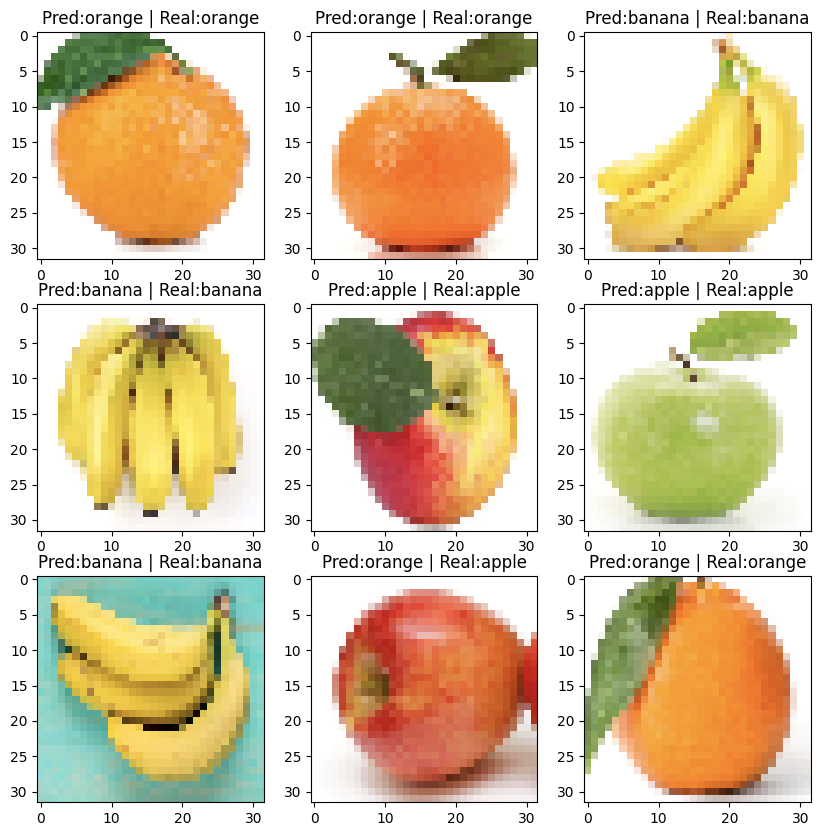

In [14]:
import numpy
plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
  classifications = model(images)
  #print(classifications)

  for i in range(9):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Pred:" + class_names[index] + " | Real:" +  class_names[labels[i]])


In [16]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("model.tflite",'wb') as f:
  f.write(tflite_model)

Saved artifact at '/tmp/tmp4apsbuem'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  133369623267280: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133369623270736: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133369623270928: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133369623271888: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133369623271312: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133369623271504: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133369623272272: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133369623274192: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133369623274576: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133369623275536: TensorSpec(shape=(), dtype=tf.resource, name=None)
